## 1
给定一个区域的梯度幅度和方向如下所示：
```
梯度幅值:
[[1. 2. 3. 2. 1.]
 [1. 2. 3. 2. 1.]
 [1. 2. 3. 2. 1.]
 [1. 2. 3. 2. 1.]
 [1. 2. 3. 2. 1.]]
方向：
[[-np.pi * 5 / 8, -np.pi * 7 / 16, -np.pi * 7 / 16, 0, -np.pi * 3 / 8],
 [np.pi / 8, -np.pi * 3 / 8, 0, 0, 0],
 [-np.pi * 3 / 16, np.pi * 9 / 16, np.pi * 5 / 16, -np.pi, -np.pi * 7 / 8],
 [np.pi / 2, np.pi * 3 / 4, 3 * np.pi / 8, np.pi * 9 / 16, -np.pi / 2],
 [np.pi * 5 / 8, np.pi * 13 / 16, -np.pi * 7 / 16, np.pi * 7 / 8, np.pi * 7 / 8]]
空间权重:
[[1. 2. 3. 2. 1.]
 [2. 4. 6. 4. 2.]
 [3. 6. 9. 6. 3.]
 [2. 4. 6. 4. 2.]
 [1. 2. 3. 2. 1.]]
```

分别计算

（1） 当采用 4 个 bins 来离散化方向空间时，请问梯度的直方图应该是多少？

（2） 当采用 8 个 bins 来离散化方向空间时，请问梯度的直方图应该是多少？

bin4 values:
dict_keys([-90, 0, 90, 180])
[0.11738227 0.43767313 0.38677285 0.05817175]
Origin:
defaultdict(<class 'float'>, {-90: 42.375, 0: 158.0, 90: 139.625, 180: 21.0})

bin8 values:
[0.19390582 0.01385042 0.05747922 0.17797784 0.22368421 0.22645429
 0.09695291 0.00969529]
Origin:
defaultdict(<class 'float'>, {-90: 70.0, -135: 5.0, -45: 20.75, 0: 64.25, 45: 80.75, 90: 81.75, 135: 35.0, 180: 3.5})


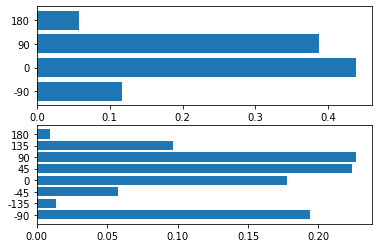

In [1]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np

Amplitude = np.ones([5, 5])
Amplitude[:, 1:4] += 1
Amplitude[:, 2:3] += 1

Ori = np.array([[-np.pi * 5 / 8, -np.pi * 7 / 16, -np.pi * 7 / 16, 0, -np.pi * 3 / 8],
                [np.pi / 8, -np.pi * 3 / 8, 0, 0, 0],
                [-np.pi * 3 / 16, np.pi * 9 / 16, np.pi * 5 / 16, -np.pi, -np.pi * 7 / 8],
                [np.pi / 2, np.pi * 3 / 4, 3 * np.pi / 8, np.pi * 9 / 16, -np.pi / 2],
                [np.pi * 5 / 8, np.pi * 13 / 16, -np.pi * 7 / 16, np.pi * 7 / 8, np.pi * 7 / 8]])

G = Amplitude
G[1:4, :] += np.asarray([1, 2, 3, 2, 1])
G[2:3, :] += np.asarray([1, 2, 3, 2, 1])


def bin4(angleDeg):
    dictionary = dict()
    discrete = [0, 90, 180, -90]
    direction = sorted(discrete, key=lambda x: abs(x - angleDeg))
    first, second = direction[:2]
    vote_second = np.abs(first - angleDeg) / 90
    vote_first = 1 - vote_second
    dictionary[first] = vote_first
    dictionary[second] = vote_second
    # print(dictionary)
    return dictionary


def bin8(angleDeg):
    dictionary = dict()
    discrete = [0, 45, 90, 135, 180, -45, -90, -135]
    direction = sorted(discrete, key=lambda x: abs(x - angleDeg))
    first, second = direction[:2]
    vote_second = np.abs(first - angleDeg) / 45
    vote_first = 1 - vote_second
    dictionary[first] = vote_first
    dictionary[second] = vote_second
    # print(dictionary)
    return dictionary


def statistics_Ori(dictionary, Amplitude, G):
    i = 0
    Af = Amplitude.flatten()
    Gf = G.flatten()
    Dict = defaultdict(float)

    for d in dictionary.flatten():
        key_1, key_2 = d.keys()
        Dict[key_1] += d[key_1] * Gf[i] * Af[i]
        Dict[key_2] += d[key_2] * Gf[i] * Af[i]
        i += 1
    return Dict


def get_discrete_orientation(Ori):
    angle_Ori = np.degrees(Ori)
    get_bin4_angle_vect = np.vectorize(bin4)
    discrete_bin4_orientation = get_bin4_angle_vect(angle_Ori)
    Dict_bin4 = statistics_Ori(discrete_bin4_orientation, Amplitude, G)

    get_bin8_angle_vect = np.vectorize(bin8)
    discrete_bin8_orientation = get_bin8_angle_vect(angle_Ori)
    Dict_bin8 = statistics_Ori(discrete_bin8_orientation, Amplitude, G)

    return Dict_bin4, Dict_bin8


def normalization(data):
    data = np.fromiter(data, dtype=float)
    _range = np.sum(data)
    return data / _range


def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma


b4, b8 = get_discrete_orientation(Ori)
nb4v = normalization(b4.values())
nb8v = normalization(b8.values())

print("bin4 values:\n{}\n{}\nOrigin:\n{}\n".format(b4.keys(),nb4v, b4))
print("bin8 values:\n{}\nOrigin:\n{}".format(nb8v, b8))

plt.subplot(211)
plt.barh(range(4), nb4v)  # 从下往上画
plt.yticks(range(4), b4.keys())

plt.subplot(212)
plt.barh(range(8), nb8v)  # 从下往上画
plt.yticks(range(8), b8.keys())

plt.show()


## 2
给定高斯函数如下所示

$$G(x, y, \sigma)=\frac{1}{2 \pi \sigma^{2}} e^{-\frac{x^{2}+y^{2}}{2 \sigma^{2}}}$$

#### （1）高斯函数对应的拉普拉斯函数

$$\frac{\partial G}{\partial x} = - \frac{x}{2\pi \sigma^4}e^{-\frac{x^2+y^2}{2\sigma^2}}$$

$$\frac{\partial^2 G}{\partial x^2} = - \frac{x}{2\pi \sigma^4}e^{-\frac{x^2+y^2}{2\sigma^2}}+\frac{x^2}{2\pi \sigma^6}e^{-\frac{x^2+y^2}{2\sigma^2}} $$

同理：

$$\frac{\partial^2 G}{\partial y^2} = - \frac{y}{2\pi \sigma^4}e^{-\frac{y^2+y^2}{2\sigma^2}}+\frac{y^2}{2\pi \sigma^6}e^{-\frac{y^2+y^2}{2\sigma^2}} $$

$$L(x,y,\sigma) = \frac{\partial^2 G}{\partial x^2} +\frac{\partial^2 G}{\partial y^2} =\frac{1}{\pi \sigma^4}\left[\frac{x^2 + y^2}{2\sigma^2 } -1   \right] e^{-\frac{x^2+y^2}{2\sigma^2} }$$
#### （2）推导高斯函数的归一化的拉普拉斯函数

$$L_{\mathrm{norm}} = \sigma^2 (\frac{\partial^2 G}{\partial x^2} + \frac{\partial^2 G}{\partial y^2}) = \frac{1}{\pi \sigma^2}\left[\frac{x^2 + y^2}{2\sigma^2 } -1   \right] e^{-\frac{x^2+y^2}{2\sigma^2} }$$
#### （3）根据有限差分形式推导高斯差分图像的形式

$$g_{1}(x, y)-g_{2}(x, y)=G_{\sigma_{1}} * f(x, y)-G_{\sigma_{2}} * f(x, y)=\left(G_{\sigma_{1}}-G_{\sigma_{2}}\right) * f(x, y)=DoG * f(x, y)$$

$$DoG \triangleq G_{\sigma_{1}}-G_{\sigma_{2}}=\frac{1}{\sqrt{2 \pi}}\left[\frac{1}{\sigma_{1}} e^{-\left(x^{2}+y^{2}\right) / 2 \sigma_{1}^{2}}-\frac{1}{\sigma_{2}} e^{-\left(x^{2}+y^{2}\right) / 2 \sigma_{2}^{2}}\right]$$

## 3
证明：
$$I \otimes G\left(\cdot,\cdot, \sigma_{1}\right) \otimes G\left(\cdot,\cdot, \sigma_{2}\right) \otimes \cdots \otimes G\left(\cdot,\cdot, \sigma_{n}\right)=I \otimes G\left(\cdot,\cdot, \sqrt{\sigma_{1}^{2}+\sigma_{2}^{2}+\cdots \sigma_{n}^{2}}\right)$$

引理：

高斯函数的傅里叶变换

$$\mathcal{F}_{x}\left[e^{-\frac{x^{2}}{2 \sigma^{2}}}\right]=e^{-2 \pi^{2} \sigma^{2} u^{2}}$$

证明:

$$f(x)=\frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{x^{2}}{2 \sigma^{2}}}$$

$$\mathcal{F}(\mu)=\int_{-\infty}^{+\infty} f(x) e^{-j 2 \pi \mu x} d x$$

令$$w=2\pi\mu$$

$$f(x)=e^{-\alpha x^{2}}$$

高斯函数的傅里叶变换为：

$$\begin{aligned}
\mathcal{F}(w) &=\int_{-\infty}^{+\infty} f(x) e^{-j w x} d x=\int_{-\infty}^{+\infty} e^{-\alpha x^{2}} e^{-j w x} d x=\int_{-\infty}^{+\infty} e^{-\left(a x^{2}+j w x\right)} d x=\int_{-\infty}^{+\infty} e^{-a\left(x+\frac{j}{2 a}\right)^{2}-\frac{w^{2}}{4 a}} d x \\
&=e^{-\frac{w^{2}}{4 a}} \int_{-\infty}^{+\infty} e^{-\left(\sqrt{a} x+\frac{jw}{2 \sqrt{a}}\right)^{2}} d x \overset{u=\sqrt{a} x+\frac{j w}{2 \sqrt{a}}}{=} e^{-\frac{u^{2}}{4 a}} \int_{-\infty}^{+\infty} e^{-u^{2}} \frac{1}{\sqrt{a}} d x \\
&=\frac{1}{\sqrt{a}} e^{-\frac{w^{2}}{4 a}} \int_{-\infty}^{+\infty} e^{-u^{2}} d x=\frac{2}{\sqrt{a}} e^{-\frac{w^{2}}{4 a}} \int_{0}^{+\infty} e^{-u^{2}} d x=\frac{2}{\sqrt{a}} e^{-\frac{-x^{2}}{4 a}} \frac{\sqrt{\pi}}{2} \\
&=\sqrt{\frac{\pi}{a}} e^{-\frac{w^{2}}{4 a}}
\end{aligned}$$

把简化的函数变为高斯函数，即令$$a=\frac{1}{2\sigma^2}$$

$$\mathcal{F}(w) =\mathcal{F}(2\pi\mu) =\sqrt{\frac{\pi}{a}} e^{-\frac{w^{2}}{4 a}}=e^{-\frac{w^{2} \sigma^{2}}{2}}=e^{-\frac{(2 \pi \mu)^{2} \sigma^{2}}{2}}=e^{-2 \pi^{2} \sigma^{2} \mu^{2}}$$

证明：

$$\mathcal{F}(f(x,y;\sigma_1))*\mathcal{F}(f(x,y;\sigma_2)) = e^{-2 \pi^{2} \sigma_{1}^{2} u^{2}} e^{-2 \pi^{2} \sigma_{2}^{2} u^{2}}=e^{-2 \pi^{2}\left(\sigma_{1}^{2}+\sigma_{2}^{2}\right) u^{2}}=\mathcal{F}(f(x,y;\sigma_3))$$

所以

$$\sigma_3^2 = \sigma_1^2+\sigma_2^2$$

$$I \otimes G\left(\cdot,\cdot, \sigma_{1}\right) \otimes G\left(\cdot,\cdot, \sigma_{2}\right) \otimes \cdots \otimes G\left(\cdot,\cdot, \sigma_{n}\right)=I \otimes G\left(\cdot,\cdot, \sqrt{\sigma_{1}^{2}+\sigma_{2}^{2}+\cdots \sigma_{n}^{2}}\right)$$